# KNN Classifier

In [1]:
# import data
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [45]:
import numpy as np
        
def distance(x,y,p):
    """Return the l_p distance """
    return sum(np.abs(x-y)**p)**(1/p)



class KNN(object):
    """The K Nearest Neighbours Classifer"""
    def __init__(self,k=3,p=2):
        self.k = k
        self.p = p # l_p norm distance
    
    def kdists(self,x_t):
        """return the k neareast neighbours"""
        all_dists = np.array([distance(x_t,x,self.p) for x in self.X])
        idx = sorted(range(len(all_dists)),key=lambda x: all_dists[x])
        #print(all_dists)
        #print(all_dists[idx[:self.k]])
        return idx[:self.k]
   
    def vote(self,y):
        """Vote for the most popular label """
        v,c =  np.unique(y,return_counts=True)
        ind = np.argmax(c)
        return v[ind]
    
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    
    def predict(self,X):
        return np.array([self.vote(self.y[self.kdists(x)]) for x in X])

In [46]:
knn = KNN(k=5,p=2)
knn.fit(X_train,y_train)

In [47]:
knn.predict(X_test)

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [48]:
y_test

array([2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

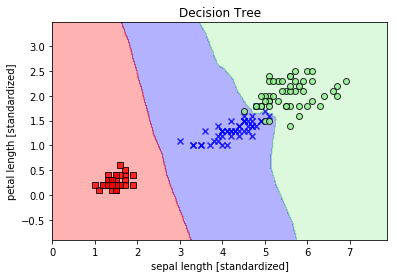

In [49]:
  import pandas as pd
  import matplotlib.pyplot as plt
  import numpy as np
  from Perceptron import plot_decision_regions

  #plt.figure()
  plot_decision_regions(X,y,classifier=knn)
  plt.title('KNN')
  plt.xlabel('sepal length [standardized]')
  plt.ylabel('petal length [standardized]')
  plt.show()